In [1]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://repo.ai.gato/registry/repository/pypi-proxy/simple
  Using cached http://repo.ai.gato/registry/repository/pypi-proxy/packages/fsspec/2024.9.0/fsspec-2024.9.0-py3-none-any.whl (179 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2025.2.0 requires fsspec==2025.2.0.*, but you have fsspec 2024.9.0 which is incompatible.
torch 2.6.0 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.
torch 2.6.0 requires triton==3.2.0; platform_system == "Linux" and platform_machine == "x86_64", but you have triton 3.1.0 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://repo.ai.gato/registry/repository/pypi-proxy/simple
  Using cached http://repo.ai.gato/registry/repository/pypi-proxy/packages/triton/3.2.0/triton-3.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (253.1 MB)
  Using cached http://repo.ai.gato/registry/repository/pypi-proxy/packages/sympy/1.13.1/sympy-1.13.1-py3-none-any.whl (6.2 MB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 데이터 다운

In [3]:
from datasets import load_dataset

dataset = load_dataset("StockLlama/ETH-USD-2022-01-01_2024-08-30")

In [4]:
print(dataset)
print('----')

print(len(dataset))
print('----')

print(dataset['train'][0])
print('----')


df = dataset['train'].to_pandas()
print(df.head())
print('----')

print(df.columns)
print('----')

print(df.info())
print('----')

# 데이터셋의 개수
print(len(df))
print('----')

print(df.shape)
print('----')

print(df.head())
print('----')

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'label'],
        num_rows: 716
    })
})
----
1
----
{'input_ids': [91.3084945678711, 93.06198120117188, 91.06491088867188, 92.02197265625, 84.88508605957031, 81.01953887939453, 74.4236831665039, 71.45851135253906, 73.38511657714844, 71.19857788085938, 75.73880004882812, 79.6678466796875, 76.03687286376953, 77.84439849853516, 78.4456787109375, 79.04292297363281, 74.98294830322266, 73.5688705444336, 71.57137298583984, 68.79751586914062, 55.81689453125, 51.342960357666016, 55.146392822265625, 52.37309646606445, 52.82950210571289, 53.18375778198242, 51.86489486694336, 55.499412536621094, 56.96365737915039, 57.15057373046875, 59.6346549987793, 62.675994873046875, 59.47576904296875, 59.36764907836914, 68.28398132324219, 69.19374084472656, 70.44813537597656, 72.93756103515625, 72.3558120727539, 75.77820587158203, 71.03409576416016, 66.63783264160156, 66.3443374633789, 65.35144805908203, 66.81636810302734, 74.03316497802734, 

# Tensor로 변환

In [108]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# input_ids를 list에서 NumPy 배열로 변환
df["input_ids"] = df["input_ids"].apply(lambda x: np.array(x))
print(df.head())
print('----')

# 입력(X)과 출력(y) 분리 - X와 y를 분리하지 않으면 모델이 무엇을 학습하고 무엇을 예측해야 하는지 모호해짐
X = np.stack(df["input_ids"].values)  # (716, sequence_length)
# y = df["label"].values  # (716,)
y = df['label'].values.reshape(-1, 1)

# loss가 너무 크게 나옴 --> -1 ~ 1 범위로 feature scaling
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(-1, 1))
y_scaled = scaler_y.fit_transform(y)

# 차원 변환 - Batch, Sequence Length, Input Size
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# 변환된 X, y
print(X.shape)
print('-----')
print("Scaled X shape:", X_scaled.shape)
print('-----')
print(y.shape)
print('-----')

# PyTorch Tensor 변환
# X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# 변환된 Tensor
print("변환된 X tensor : ", X_tensor.shape)
print('-----')
print("변환된 Y tensor : ", y_tensor.shape)
print('-----')

# 일부 데이터 샘플 확인
print(X_tensor[0]) # 첫 번째 샘플
print('-----')
print(y_tensor[0]) # 첫 번째 라벨
print('-----')

                                           input_ids      label
0  [91.308495, 93.06198, 91.06491, 92.02197, 84.8...  28.777820
1  [93.06198, 91.06491, 92.02197, 84.885086, 81.0...  24.001883
2  [91.06491, 92.02197, 84.885086, 81.01954, 74.4...  22.852409
3  [92.02197, 84.885086, 81.01954, 74.42368, 71.4...  23.944717
4  [84.885086, 81.01954, 74.42368, 71.45851, 73.3...  20.007884
----
(716, 256)
-----
Scaled X shape: (716, 256, 1)
-----
(716, 1)
-----
변환된 X tensor :  torch.Size([716, 256, 1])
-----
변환된 Y tensor :  torch.Size([716, 1])
-----
tensor([[ 0.9578],
        [ 1.0000],
        [ 0.9767],
        [ 1.0000],
        [ 1.0000],
        [ 0.9174],
        [ 0.7393],
        [ 0.6593],
        [ 0.7113],
        [ 0.6523],
        [ 0.7749],
        [ 0.8809],
        [ 0.7829],
        [ 0.8317],
        [ 0.8479],
        [ 0.8641],
        [ 0.7544],
        [ 0.7163],
        [ 0.6623],
        [ 0.5874],
        [ 0.2370],
        [ 0.1162],
        [ 0.2189],
        [ 0.144

# PyTorch Dataset 및 DataLoader 생성

In [101]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset

# 추후 데이터셋에 normalization 용이한 적용을 고려하여 Dataset class 생성
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataset 생성
dataset = MyDataset(X_tensor, y_tensor)


# 총 데이터 개수는 716개임. 이거를 train, valid, test = 8:1:1로 분할
train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(f"train data 크기: {len(train_dataset)}")
print(f"valid data 크기: {len(valid_dataset)}")
print(f"test data 크기: {len(test_dataset)}")

print('----')

# DataLoader 설정
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # train data는 random하게 해야 하므로 shuffle - true
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False) # val, test는 일관된 순서로 val, test해야하므로 shuffle - false
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(f"Train DataLoader: {len(train_loader)}")
print(f"Valid DataLoader: {len(valid_loader)}")
print(f"Test DataLoader: {len(test_loader)}")

train data 크기: 572
valid data 크기: 71
test data 크기: 73
----
Train DataLoader: 18
Valid DataLoader: 3
Test DataLoader: 3


In [55]:
import torch
print(torch.__version__)

2.6.0+cu124


# 랜덤시드

In [102]:
import torch
import random
import numpy as np

def seed_setting(seed=2025):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed = 2025
seed_setting(seed=seed)

# RNN, LSTM, GRU 모델 정의

## RNN

In [103]:
import torch.nn as nn

# RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        rnn_output, _ = self.rnn(x)  # hidden_state 제거
        output = self.fc(rnn_output[:, -1, :])
        return output  # hidden_state 제거하고 output만 반환

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_output, _ = self.lstm(x)  # hidden_state 제거
        output = self.fc(lstm_output[:, -1, :])
        return output  # hidden_state 제거하고 output만 반환

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        gru_output, _ = self.gru(x)  # hidden_state 제거
        output = self.fc(gru_output[:, -1, :])
        return output  # hidden_state 제거하고 output만 반환

In [58]:
# # optimizer, loss function 설정
# def get_criterion_optimizer(model):
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # scheduler
#     scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
#     return criterion, optimizer, scheduler

# train, test, valid

In [104]:
class EarlyStopping : 
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [115]:
def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=50, patience=5, device="cpu"):
    model.to(device)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    early_stopping = EarlyStopping(patience=patience)

    for epoch in range(epochs):
        model.train() # train을 에포크 안에 넣기.
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            y_pred = model(X_batch) 
            loss = criterion(y_pred.squeeze(), y_batch.squeeze())#크기 맞춤
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            correct_train += (torch.abs(y_pred - y_batch) < 0.1).sum().item()
            total_train += y_batch.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation
        model.eval()
        
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for X_val, y_val in valid_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)

                y_val_pred = model(X_val)  # 🔥 unsqueeze 제거
                loss_val = criterion(y_val_pred.squeeze(), y_val.squeeze())  # 🔥 크기 맞춤
                val_loss += loss_val.item()

                correct_val += (torch.abs(y_val_pred - y_val) < 0.1).sum().item()
                total_val += y_val.size(0)

        val_losses.append(val_loss / len(valid_loader))
        val_accuracies.append(correct_val / total_val)

        scheduler.step()
        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stop.")
            break
    
    return train_losses, val_losses, train_accuracies, val_accuracies


def test_model(model, test_loader, criterion, device="cpu"):
    model.to(device)
    model.eval()
    test_loss = 0.0
    predictions, actuals = [], []
    with torch.no_grad():
        # for X_test, y_test in test_loader:
        #     X_test, y_test = X_test.to(device), y_test.to(device)
        #     X_test = X_test.unsqueeze(1)
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            y_test_pred = model(X_test)  #  unsqueeze(1) 제거해야 차원이 맞음
        
            y_test_pred = model(X_test)  # `hidden_state` 반환 없음
            loss_test = criterion(y_test_pred.squeeze(), y_test)
            test_loss += loss_test.item()
            predictions.extend(y_test_pred.squeeze().tolist())
            actuals.extend(y_test.tolist())
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, predictions, actuals

In [117]:
import torch
import torch.optim as optim
import torch.nn as nn


# Model training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Model parameters
input_size = 1
hidden_size = 64
num_layers = 2
learning_rate = 0.0005
epochs = 50
patience = 5

criterion = nn.MSELoss()
optimizer_fn = lambda model: optim.Adam(model.parameters(), lr=learning_rate)
scheduler_fn = lambda optimizer: optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Define models
models = {
    "RNN": RNNModel(input_size, hidden_size, num_layers).to(device),
    "LSTM": LSTMModel(input_size, hidden_size, num_layers).to(device),
    "GRU": GRUModel(input_size, hidden_size, num_layers).to(device),
}

# Train models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    optimizer = optimizer_fn(model)
    scheduler = scheduler_fn(optimizer)
    results[name] = train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=epochs, patience=patience, device=device)

# Test models
for name, model in models.items():
    print(f"\nTesting {name}...")
    test_model(model, test_loader, criterion, device=device)

Using device: cuda

Training RNN...
Epoch [1/50] - Train Loss: 0.2645, Val Loss: 0.1285, Train Acc: 0.1101, Val Acc: 0.3380
Epoch [2/50] - Train Loss: 0.0571, Val Loss: 0.0088, Train Acc: 0.4371, Val Acc: 0.7465
Epoch [3/50] - Train Loss: 0.0116, Val Loss: 0.0062, Train Acc: 0.6958, Val Acc: 0.8592
Epoch [4/50] - Train Loss: 0.0076, Val Loss: 0.0058, Train Acc: 0.8392, Val Acc: 0.8732
Epoch [5/50] - Train Loss: 0.0068, Val Loss: 0.0049, Train Acc: 0.8497, Val Acc: 0.8451
Epoch [6/50] - Train Loss: 0.0065, Val Loss: 0.0047, Train Acc: 0.8566, Val Acc: 0.8592
Epoch [7/50] - Train Loss: 0.0061, Val Loss: 0.0045, Train Acc: 0.8654, Val Acc: 0.8592
Epoch [8/50] - Train Loss: 0.0059, Val Loss: 0.0051, Train Acc: 0.8811, Val Acc: 0.8732
Epoch [9/50] - Train Loss: 0.0057, Val Loss: 0.0043, Train Acc: 0.8654, Val Acc: 0.9014
Epoch [10/50] - Train Loss: 0.0053, Val Loss: 0.0039, Train Acc: 0.8934, Val Acc: 0.8873
Epoch [11/50] - Train Loss: 0.0051, Val Loss: 0.0039, Train Acc: 0.8969, Val Acc: 0

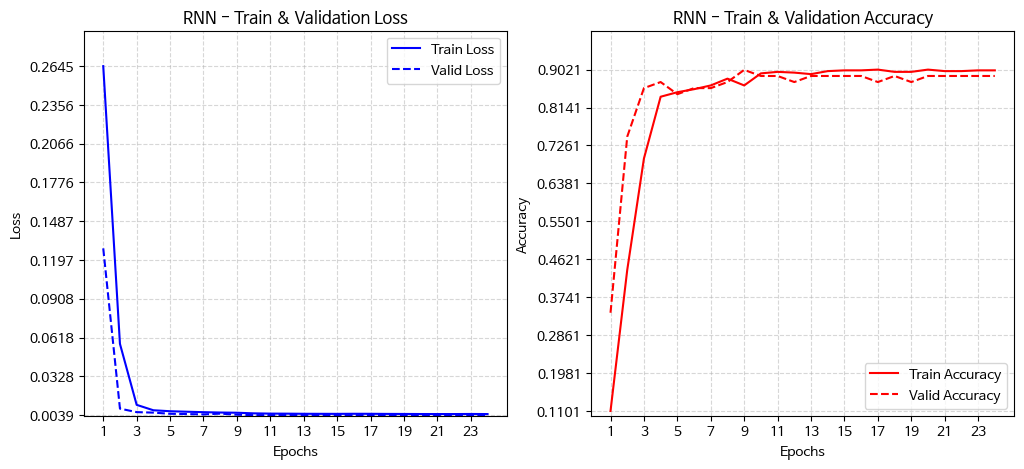

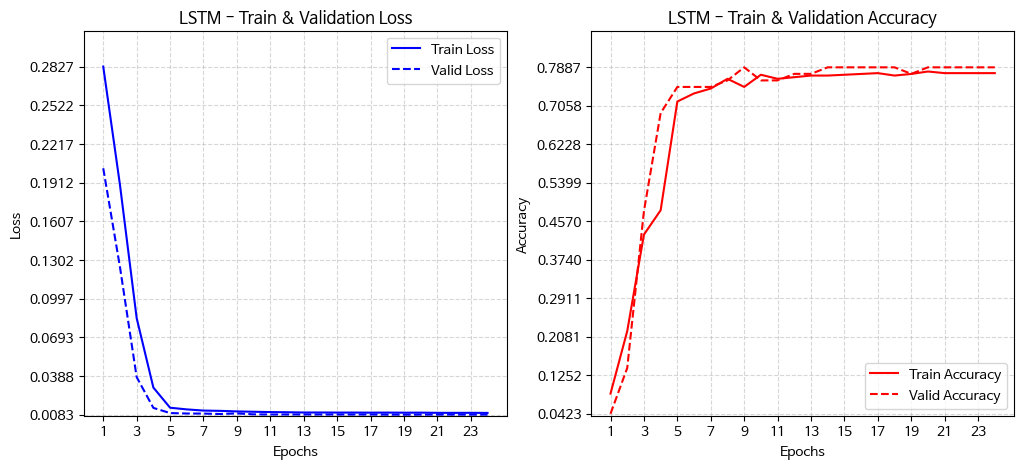

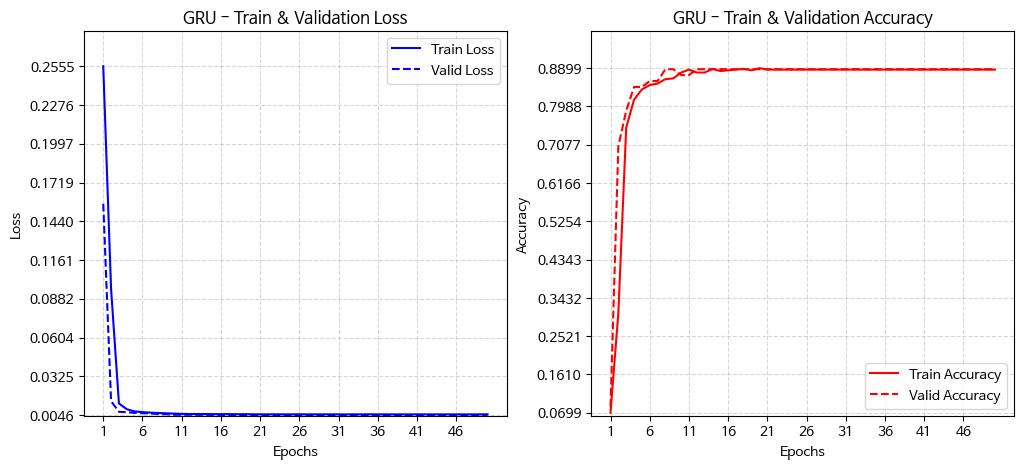

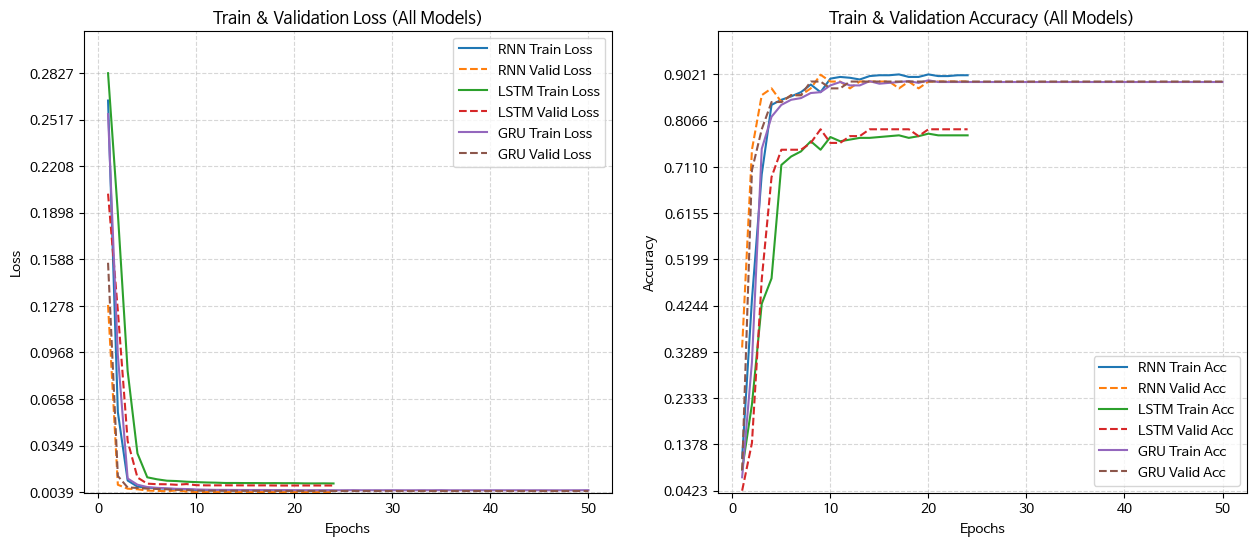

In [127]:
import matplotlib.pyplot as plt
import numpy as np

def plot_individual_results(results):
    """
    각 모델별 Train & Validation Loss & Accuracy 그래프를 개별 출력
    """
    for name, (train_losses, val_losses, train_accuracies, val_accuracies) in results.items():
        epochs = range(1, len(train_losses) + 1)

        plt.figure(figsize=(12, 5))

        # Train & Validation Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label="Train Loss", color='blue')
        plt.plot(epochs, val_losses, label="Valid Loss", linestyle="dashed", color='blue')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"{name} - Train & Validation Loss")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)

        # y축 세밀한 눈금 설정 (Loss 범위 자동 조정)
        loss_min = min(min(train_losses), min(val_losses))
        loss_max = max(max(train_losses), max(val_losses))
        plt.ylim(loss_min * 0.9, loss_max * 1.1)  # 여백 추가
        plt.yticks(np.linspace(loss_min, loss_max, num=10))  # 10개 눈금 설정

        plt.xticks(range(1, len(train_losses) + 1, max(1, len(train_losses) // 10)))

        # Train & Validation Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracies, label="Train Accuracy", color='red')
        plt.plot(epochs, val_accuracies, label="Valid Accuracy", linestyle="dashed", color='red')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title(f"{name} - Train & Validation Accuracy")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)

        # y축 세밀한 눈금 설정 - Accuracy 범위 자동 조정
        acc_min = min(min(train_accuracies), min(val_accuracies))
        acc_max = max(max(train_accuracies), max(val_accuracies))
        plt.ylim(acc_min * 0.9, acc_max * 1.1)  # 여백 추가
        plt.yticks(np.linspace(acc_min, acc_max, num=10))  # 10개 눈금 설정

        plt.xticks(range(1, len(train_accuracies) + 1, max(1, len(train_accuracies) // 10)))

        plt.show()

def plot_overall_results(results):
    """
    모든 모델을 한 그래프에서 비교 (Train Loss & Valid Loss / Train Accuracy & Valid Accuracy)
    """
    plt.figure(figsize=(15, 6))

    # Train, Validation Loss 비교
    plt.subplot(1, 2, 1)
    all_losses = []
    for name, (train_losses, val_losses, _, _) in results.items():
        epochs = range(1, len(train_losses) + 1)
        plt.plot(epochs, train_losses, label=f"{name} Train Loss")
        plt.plot(epochs, val_losses, label=f"{name} Valid Loss", linestyle="dashed")
        all_losses.extend(train_losses + val_losses)

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train & Validation Loss (All Models)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    # y축 세밀한 눈금 설정 - Loss 범위 자동 조정
    loss_min, loss_max = min(all_losses), max(all_losses)
    plt.ylim(loss_min * 0.9, loss_max * 1.1)
    plt.yticks(np.linspace(loss_min, loss_max, num=10))

    # Train, Validation Accuracy 비교
    plt.subplot(1, 2, 2)
    all_accuracies = []
    for name, (_, _, train_accuracies, val_accuracies) in results.items():
        epochs = range(1, len(train_accuracies) + 1)
        plt.plot(epochs, train_accuracies, label=f"{name} Train Acc")
        plt.plot(epochs, val_accuracies, label=f"{name} Valid Acc", linestyle="dashed")
        all_accuracies.extend(train_accuracies + val_accuracies)

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Train & Validation Accuracy (All Models)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    # y축 세밀한 눈금 설정 - Accuracy 범위 자동 조정
    acc_min, acc_max = min(all_accuracies), max(all_accuracies)
    plt.ylim(acc_min * 0.9, acc_max * 1.1)
    plt.yticks(np.linspace(acc_min, acc_max, num=10))

    plt.show()

plot_individual_results(results)

plot_overall_results(results)

# 모델 별 비교
## RNN
- Train Loss 감소: 0.2645 → 0.0047
- Validation Loss 감소: 0.1285 → 0.0039
- Train Accuracy 증가: 0.1101 → 0.9003
- Validation Accuracy 증가: 0.3380 → 0.8873

- 문제점:
- 초반 학습 속도가 빠르지만 수렴이 빠르게 정체됨
- LSTM/GRU 대비 Validation Accuracy가 낮고 오버피팅 가능성 있음
- 장기 의존성(Long-Term Dependency) 문제로 인해 더 깊은 학습이 어려울 수 있음

## LSTM
- Train Loss 감소: 0.2827 → 0.0097
- Validation Loss 감소: 0.2025 → 0.0083
- Train Accuracy 증가: 0.0857 → 0.7762
- Validation Accuracy 증가: 0.0423 → 0.7887


- 특징:
- 초반 성능이 낮았으나 빠르게 안정적인 학습 진행
- Validation Accuracy가 상승한 이후 서서히 정체
- Train & Validation Loss 간 차이가 적음 → 과적합 가능성 낮음
- RNN 대비 장기 의존성 문제 해결 → 더 나은 성능

## GRU
- Train Loss 감소: 0.2555 → 0.0051
- Validation Loss 감소: 0.1565 → 0.0046
- Train Accuracy 증가: 0.0699 → 0.8864
- Validation Accuracy 증가: 0.0845 → 0.8873


- 특징:
- LSTM보다 빠르게 Loss가 낮아지고 Accuracy 상승
- Validation Accuracy가 가장 높음 (0.8873) → 가장 효과적인 모델.
- LSTM과 비슷한 학습 곡선이나 더 빠르게 수렴.
- 적은 파라미터로 높은 성능을 보임.

# overfitting 여부 분석

오버피팅 여부 분석
	•	RNN: Train Accuracy가 0.90+로 매우 높지만, Validation Accuracy가 0.88에서 정체됨 → 오버피팅 가능성 있음.
	•	LSTM: Train & Validation 간 큰 차이 없음 → 과적합 가능성이 낮음, 안정적.
	•	GRU: Train과 Validation이 거의 동일하게 수렴 → 가장 일반화 성능이 뛰어남.